In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("houses.csv")

# handle these better with your own dataset, here we are simply dropping these
df = df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)

variable = "grade"

# Calculate the median
median = df[variable].median()

# Calculate MAD
mad = np.median(np.abs(df[variable] - median))

# Define a threshold for noise detection
# adjust the numeric modifier for aggressiveness 
# e.g. try 2.5 or 4.5 etc.
# if the value is too high, you will find no noise (decrease in that case)
threshold = 3.0 * mad

# Detect noise
noise = df[np.abs(df[variable] - median) > threshold]

inliers = df.drop(noise.index)

print("Detected noise using MAD:")
noise

Detected noise using MAD:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930
70,1040000.0,5,3.25,4770,50094,1.0,0,0,4,11,3070,1700,1973,0,3530,38917
153,2250000.0,4,3.25,5180,19850,2.0,0,3,3,12,3540,1640,2006,0,3160,9750
269,2900000.0,4,3.25,5050,20100,1.5,0,2,3,11,4750,300,1982,2008,3890,20060
270,1365000.0,4,4.75,5310,57346,2.0,0,0,4,11,5310,0,1989,0,4180,47443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21532,1325000.0,4,4.00,4420,16526,2.0,0,0,3,11,4420,0,2013,0,3510,50447
21548,1057000.0,2,1.50,2370,184231,2.0,0,0,3,11,2370,0,2005,0,3860,151081
21551,1375000.0,5,4.50,4350,13405,2.0,0,0,3,11,4350,0,2014,0,3990,7208
21590,1222500.0,4,3.50,4910,9444,1.5,0,0,3,11,3110,1800,2007,0,4560,11063


In [3]:
print(len(inliers))
print(len(noise))

21107
506


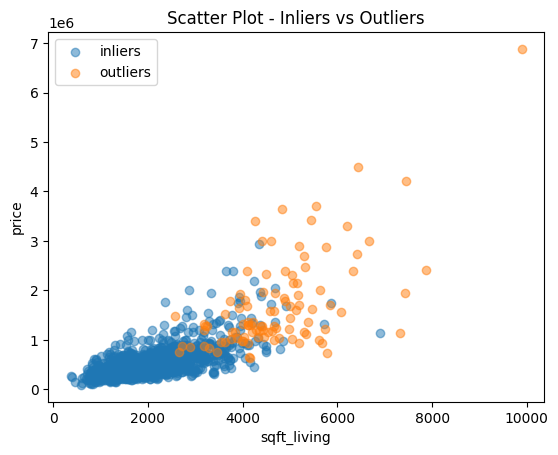

In [4]:
import matplotlib.pyplot as plt

variable = "sqft_living"
target = "price"

# if you want to reduce the number of points visualized
# sample a small amount of points, for example 300-500
inliers_sample = inliers.sample(1200)
outliers_sample = noise.sample(100)

plt.scatter(inliers_sample[variable], inliers_sample[target], label="inliers", alpha=0.5)
plt.scatter(outliers_sample[variable], outliers_sample[target], label="outliers", alpha=0.5)

plt.xlabel(variable)
plt.ylabel(target)

plt.title("Scatter Plot - Inliers vs Outliers")
plt.legend()
plt.show()